In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
hire=pd.read_csv("../Datasets/hiring.csv")
hire.head()

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,five,8.0,6,45000
2,two,6.0,7,60000
3,seven,10.0,10,65000
4,three,9.0,6,70000


In [9]:
hire.shape

(8, 4)

In [10]:
hire.tail()

,experience,test_score,interview_score,salary
3,seven,10.0,10,65000
4,three,9.0,6,70000
5,ten,7.0,10,62000
6,eleven,NaN,7,72000
7,NaN,7.0,8,80000


In [11]:
hire.isna().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [7]:
pip install Word2Number

  Created wheel for Word2Number: filename=word2number-1.1-py3-none-any.whl size=5580 sha256=6d1acb498ee45cca95f38491cd39cb7bca6ad97c3a6b584582f93368fc38621e
  Stored in directory: c:\users\abhinav singh\appdata\local\pip\cache\wheels\a0\4a\5b\d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built Word2Number



In [12]:
from word2number import w2n

In [15]:
hire['experience']=hire.experience.fillna("zero")
hire.experience

0      zero
1      five
2       two
3     seven
4     three
5       ten
6    eleven
7      zero
Name: experience, dtype: object

In [25]:
hire.experience=hire.experience.apply(w2n.word_to_num)
hire.head()
# Once Done it won't take it Back

In [21]:
hire.head()

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,5,8.0,6,45000
2,2,6.0,7,60000
3,7,10.0,10,65000
4,3,9.0,6,70000


In [26]:
hire.isnull().sum()

experience         0
test_score         1
interview_score    0
salary             0
dtype: int64

In [29]:
hire[hire['test_score'].isnull()]

,experience,test_score,interview_score,salary
6,11,NaN,7,72000


In [30]:
hire.describe()

,experience,test_score,interview_score,salary
count,8.00000,7.000000,8.000000,8.00000
mean,4.75000,7.857143,7.875000,63000.00000
std,4.26782,1.345185,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.500000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


In [32]:
hire[hire['salary']>60000]

,experience,test_score,interview_score,salary
3,7,10.0,10,65000
4,3,9.0,6,70000
5,10,7.0,10,62000
6,11,NaN,7,72000
7,0,7.0,8,80000


In [35]:
med=hire.test_score.median()
hire['test_score']=hire['test_score'].fillna(med)
hire

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,5,8.0,6,45000
2,2,6.0,7,60000
3,7,10.0,10,65000
4,3,9.0,6,70000
5,10,7.0,10,62000
6,11,8.0,7,72000
7,0,7.0,8,80000


In [36]:
med

8.0

In [38]:
hire.iloc[6:7]

,experience,test_score,interview_score,salary
6,11,8.0,7,72000


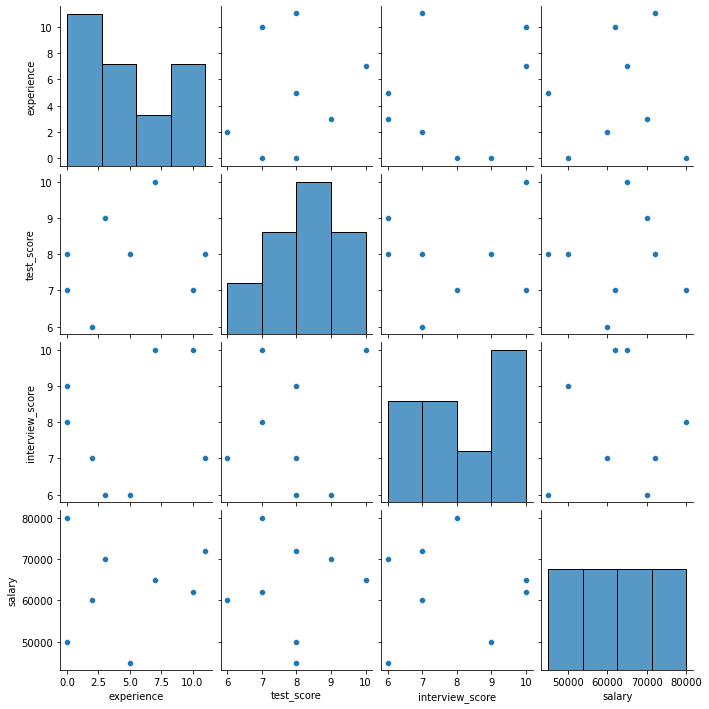

In [40]:
sns.pairplot(hire)
# all the columns with their relations

In [42]:
X=hire.iloc[:,:-1].values
X

array([[ 0.,  8.,  9.],
       [ 5.,  8.,  6.],
       [ 2.,  6.,  7.],
       [ 7., 10., 10.],
       [ 3.,  9.,  6.],
       [10.,  7., 10.],
       [11.,  8.,  7.],
       [ 0.,  7.,  8.]])

In [44]:
y=hire.iloc[:,[3]].values
y


array([[50000],
       [45000],
       [60000],
       [65000],
       [70000],
       [62000],
       [72000],
       [80000]], dtype=int64)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [75]:
len(X_train)

5

In [76]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [77]:
y_pred=reg.predict(X_test)
y_pred

array([[75417.92086116],
       [73927.83813416],
       [75946.47662713]])

In [78]:
reg.score(X_test,y_test)

-2.178555392726664

In [79]:
reg.predict([[15,9,8]])

array([[72172.2316356]])

In [80]:
reg.intercept_

array([108844.51310675])

In [81]:
reg.coef_

array([[  532.64228047, -1651.84889863, -3724.40944882]])

In [82]:
reg.predict([[2,9,6]])

array([[72696.70088707]])

In [83]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE 16097.41187414865
MSE 387783757.91265297
RMSE 126.87557635001565
